# Directed scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin import DPA
from netin import DH
from netin import DPAH
from netin import viz
from netin import stats

## Network parameters

In [2]:
n = 1000
f_m = 0.1
d = 0.01
h_MM = 0.9
h_mm = 0.9
plo_M = 2.0
plo_m = 2.0
seed = 1234

## Generation

In [3]:
# DPA: Preferential attachment only
g_dpa = DPA(n=n, f_m=f_m, d=d, plo_M=plo_M, plo_m=plo_m, seed=seed)
g_dpa.generate()
g_dpa.info()

=== Params ===
n: 1000
f_m: 0.1
number of minority nodes: 100
d: 0.01 (expected edges: 9990)
plo_M: 2.0
plo_m: 2.0
seed: 1234
=== Model ===
Model: DPA
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 23.721049308776855 (secs)
=== Computed ===
- is directed: True
- number of nodes: 1000
- number of edges: 9990
- expected number of edges: 9990
- minimum degree: 0
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 7779, 'mM': 1318, 'Mm': 764, 'mm': 129})
- density: 0.01
- diameter: <Found infinite path length because the digraph is not strongly connected>
- average shortest path length: <Graph is not strongly connected.>
- average degree: 19.98
- degree assortativity: -0.26914952320311736
- attribute assortativity (m): -0.0003329123753653206
- transitivity: 0.02759835864845332
- average clustering: 0.2573725153237667
- Powerlaw fit (in_degree):
- M: alpha=2.496649960495219, sigma=0.1283366753392609, min=18.0, max=249.0
- m: alpha=1.381574199121

/home/espinl/.conda/envs/py39NetIn/lib/python3.9/site-packages/powerlaw.py:1195: RuntimeWarning: divide by zero encountered in scalar divide
  C = 1.0/C
/home/espinl/.conda/envs/py39NetIn/lib/python3.9/site-packages/scipy/optimize/_optimize.py:863: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


- Powerlaw fit (out_degree):
- M: alpha=2.3442517940664267, sigma=0.0726888121303443, min=6.0, max=958.0
- m: alpha=1.8533163692847354, sigma=0.10503598417232897, min=3.0, max=317.0


In [4]:
# DH: Homophily only
g_dh = DH(n=n, f_m=f_m, d=d, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
g_dh.generate()
g_dh.info()

=== Params ===
n: 1000
f_m: 0.1
number of minority nodes: 100
d: 0.01 (expected edges: 9990)
plo_M: 2.0
plo_m: 2.0
h_MM: 0.9
h_mm: 0.9
mixing matrix: 
[[0.9 0.1]
 [0.1 0.9]]
seed: 1234
=== Model ===
Model: DH
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 24.6719069480896 (secs)
=== Computed ===
- is directed: True
- number of nodes: 1000
- number of edges: 9990
- expected number of edges: 9990
- minimum degree: 0
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 8330, 'mM': 921, 'mm': 536, 'Mm': 203})
- density: 0.01
- diameter: <Found infinite path length because the digraph is not strongly connected>
- average shortest path length: <Graph is not strongly connected.>
- average degree: 19.98
- degree assortativity: -0.16251457434151342
- attribute assortativity (m): 0.4324493087904658
- transitivity: 0.01263336210385322
- average clustering: 0.1511941828172355
- Empirical homophily within majority: 0.820124052377674
- Empirical homophily

In [5]:
# DPAH: Preferential attachment and homophily
g_dpah = DPAH(n=n, f_m=f_m, d=d, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
g_dpah.generate()
g_dpah.info()

=== Params ===
n: 1000
f_m: 0.1
number of minority nodes: 100
d: 0.01 (expected edges: 9990)
plo_M: 2.0
plo_m: 2.0
h_MM: 0.9
h_mm: 0.9
mixing matrix: 
[[0.9 0.1]
 [0.1 0.9]]
seed: 1234
=== Model ===
Model: DPAH
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 27.09415912628174 (secs)
=== Computed ===
- is directed: True
- number of nodes: 1000
- number of edges: 9990
- expected number of edges: 9990
- minimum degree: 0
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 8371, 'mM': 1082, 'mm': 375, 'Mm': 162})
- density: 0.01
- diameter: <Found infinite path length because the digraph is not strongly connected>
- average shortest path length: <Graph is not strongly connected.>
- average degree: 19.98
- degree assortativity: -0.23529174201924047
- attribute assortativity (m): 0.322942187305403
- transitivity: 0.02533536756428301
- average clustering: 0.2404026829503908
- Powerlaw fit (in_degree):
- M: alpha=2.483721579009412, sigma=0.115507568

## Plots

In [6]:
viz.reset_style()
viz.set_paper_style()

### Graph

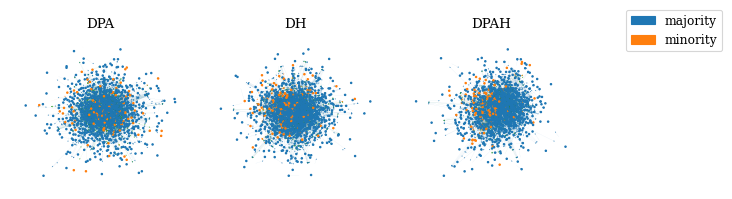

In [7]:
graphs = [g_dpa, g_dh, g_dpah]
viz.plot_graph(graphs, 
               cell_size=2, 
               ignore_singletons=True, 
               share_pos=False)

### Node attributes

In [8]:
md_dpa = g_dpa.get_node_metadata_as_dataframe(n_jobs=10)
md_dh = g_dh.get_node_metadata_as_dataframe(n_jobs=10)
md_dpah = g_dpah.get_node_metadata_as_dataframe(n_jobs=10)


QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [9]:
# see example of generate metadata 
md_dpa.head()

,node,class_label,real_label,source,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,M,M,model,NaN,14,7,0.209524,0.000954,0.319764,2.155590e-02,0.000739,NaN,0.800000,0.895522,0.462039,0.294437,0.403226,0.244151,0.408135
1,1,M,M,model,NaN,1,1,0.500000,0.000000,0.001001,1.307307e-18,0.000156,NaN,0.985714,0.985075,0.010846,1.000000,0.998208,0.871821,0.998597
2,2,M,M,model,NaN,1,1,0.500000,0.000000,0.001001,-1.608149e-18,0.000156,NaN,0.985714,0.985075,0.010846,1.000000,0.998208,0.976602,0.998597
3,3,M,M,model,NaN,5,6,0.245455,0.000102,0.289167,7.007980e-03,0.000430,NaN,0.928571,0.910448,0.310195,0.613297,0.693548,0.534079,0.580645
4,4,M,M,model,NaN,30,7,0.203759,0.001867,0.385353,6.919300e-02,0.003975,NaN,0.571429,0.895522,0.485900,0.150611,0.064516,0.046796,0.063114


In [10]:
# all into a list
distributions = [md_dpa, md_dh, md_dpah]

#### In-degree

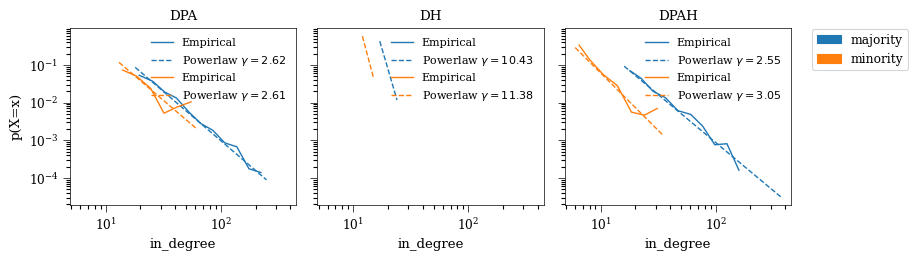

In [11]:
viz.plot_powerlaw_fit(distributions, col_name='in_degree', hue='class_label',
                      kind='pdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

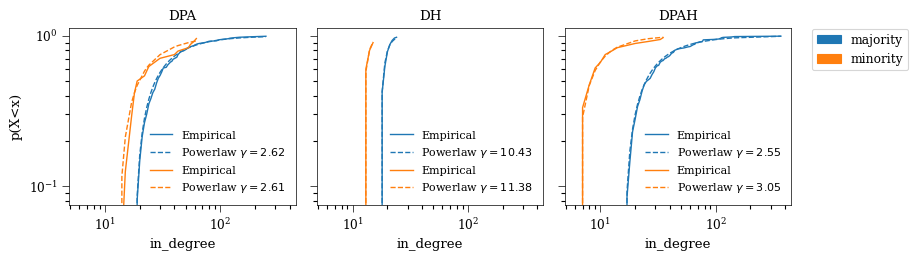

In [12]:
viz.plot_powerlaw_fit(distributions, col_name='in_degree', hue='class_label',
                      kind='cdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

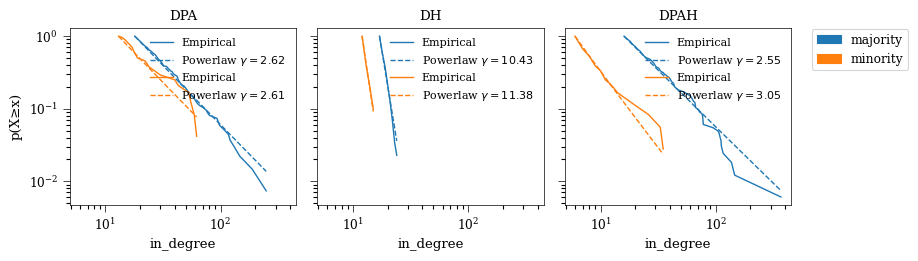

In [13]:
viz.plot_powerlaw_fit(distributions, col_name='in_degree', hue='class_label',
                      kind='ccdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

#### Out-degree

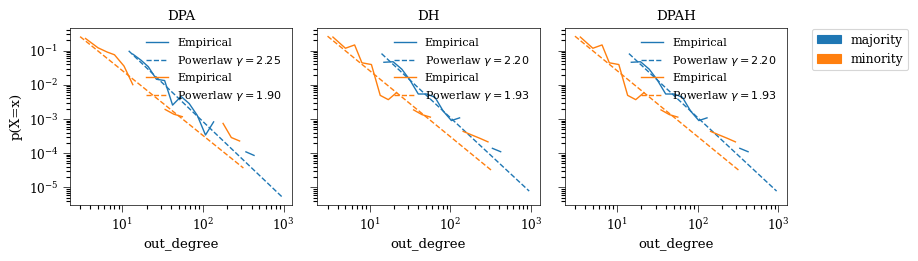

In [14]:
viz.plot_powerlaw_fit(distributions, col_name='out_degree', hue='class_label',
                      kind='pdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

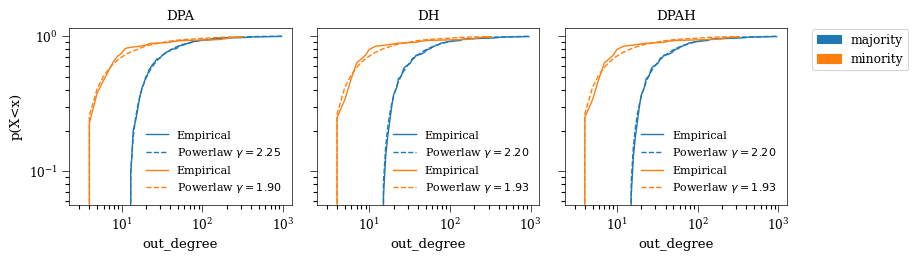

In [15]:
viz.plot_powerlaw_fit(distributions, col_name='out_degree', hue='class_label',
                      kind='cdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

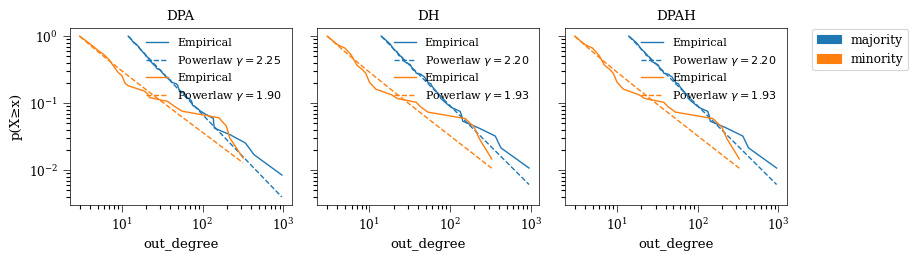

In [16]:
viz.plot_powerlaw_fit(distributions, col_name='out_degree', hue='class_label',
                      kind='ccdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

#### Clustering

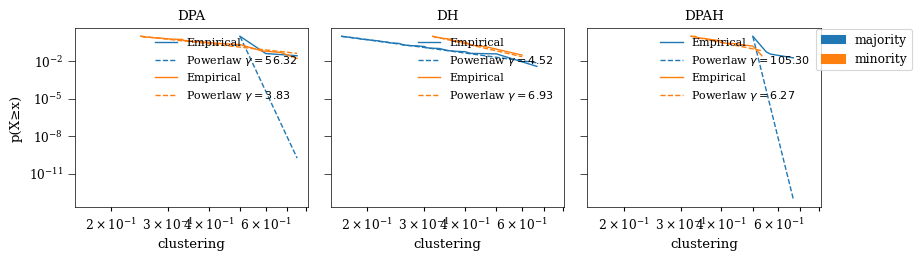

In [17]:
viz.plot_powerlaw_fit(distributions, col_name='clustering', hue='class_label',
                      kind='ccdf', verbose=False, bbox=(0.97, 0.9), fontsize=8, 
                      wspace=0.1, cell_size=(2.8,2.7), sharex=True, sharey=True)

#### PageRank

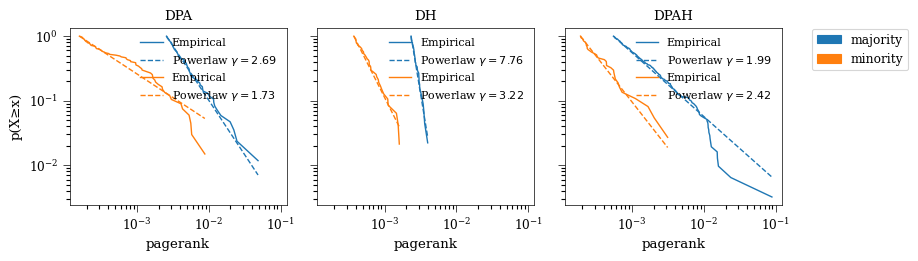

In [18]:
viz.plot_powerlaw_fit(distributions, col_name='pagerank', hue='class_label',
                      kind='ccdf', verbose=False, bbox=(1.0, 0.9), fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)